In [66]:
import torch
from matplotlib import pyplot as plt

In [67]:
torch.manual_seed(41)

## Synthetic Binary Classification Datasets

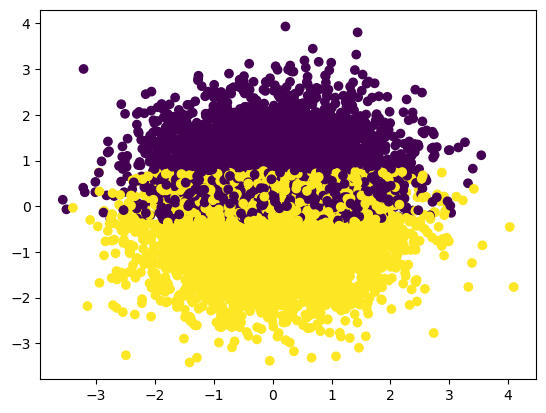

In [68]:
from calvera.benchmark.datasets.synthetic import LinearSyntheticDataset

s = LinearSyntheticDataset()


# color by y
color_values = torch.matmul(s.Phi, s.theta_opt)
plt.scatter(s.X[:, 0].squeeze(), s.X[:, 1].squeeze(), c=s.y)
plt.show()

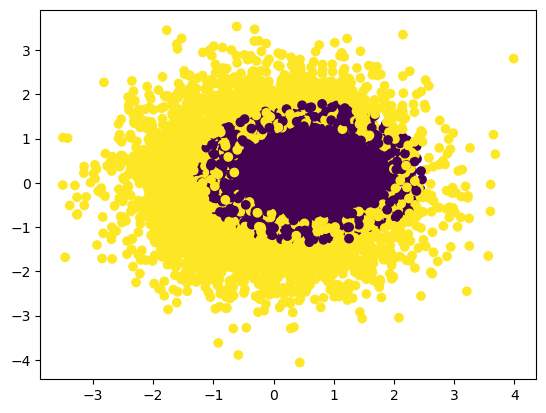

In [69]:
from calvera.benchmark.datasets.synthetic import QuadraticSyntheticDataset

s = QuadraticSyntheticDataset()

from matplotlib import pyplot as plt

# color by y
color_values = torch.matmul(s.Phi, s.theta_opt)
plt.scatter(s.X[:, 0].squeeze(), s.X[:, 1].squeeze(), c=s.y)
plt.show()

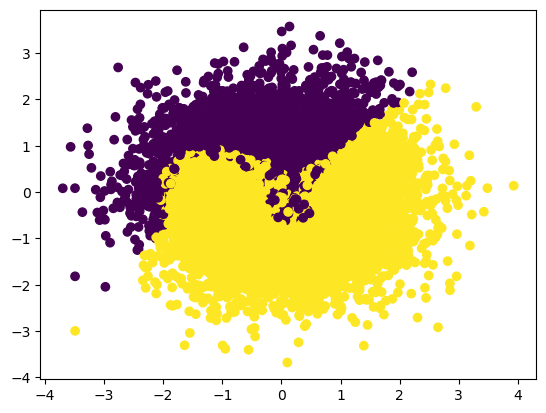

In [70]:
from calvera.benchmark.datasets.synthetic import CubicSyntheticDataset

s = CubicSyntheticDataset()

from matplotlib import pyplot as plt

# color by y
color_values = torch.matmul(s.Phi, s.theta_opt)
plt.scatter(s.X[:, 0].squeeze(), s.X[:, 1].squeeze(), c=s.y)
plt.show()

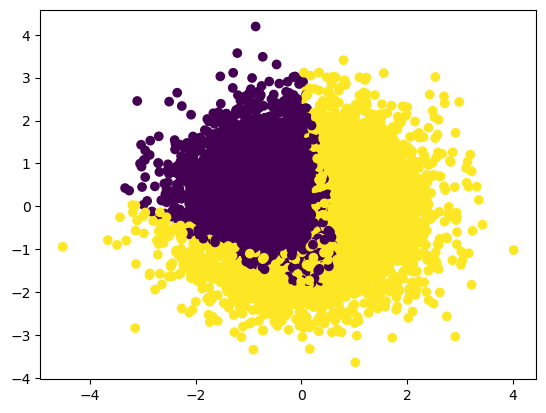

In [71]:
from calvera.benchmark.datasets.synthetic import LinearCombinationSyntheticDataset

s = LinearCombinationSyntheticDataset()

from matplotlib import pyplot as plt

# color by y
color_values = torch.matmul(s.Phi, s.theta_opt)
plt.scatter(s.X[:, 0].squeeze(), s.X[:, 1].squeeze(), c=s.y)
plt.show()

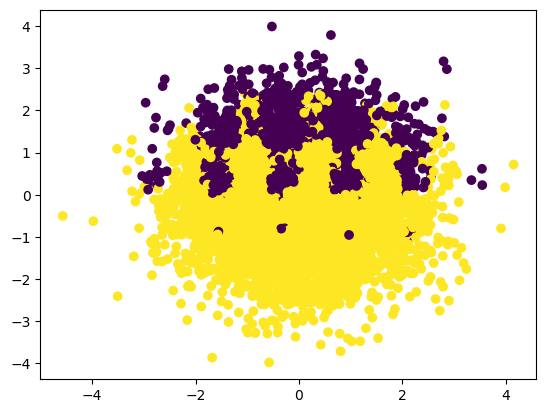

In [72]:
from calvera.benchmark.datasets.synthetic import SinSyntheticDataset

s = SinSyntheticDataset()

from matplotlib import pyplot as plt

# color by y
color_values = torch.matmul(s.Phi, s.theta_opt)
plt.scatter(s.X[:, 0].squeeze(), s.X[:, 1].squeeze(), c=s.y)
plt.show()

## Wheel Dataset

Based on: Riquelme et al. "Deep Bayesian Bandits Showdown: An Empirical Comparison of Bayesian Deep Networks for
Thompson Sampling" https://arxiv.org/abs/1802.09127

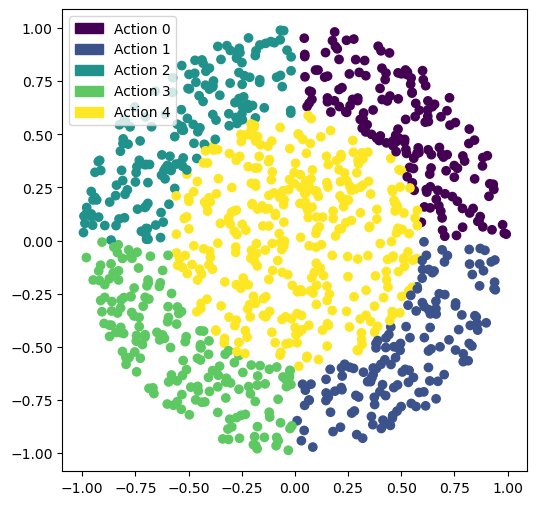

In [77]:
from calvera.benchmark.datasets.wheel import WheelBanditDataset

s = WheelBanditDataset(1000, 0.6)

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(6, 6))
# color by y. add a legend
plt.scatter(s.data[:, 0].squeeze(), s.data[:, 1].squeeze(), c=s.rewards.argmax(dim=1).int(), cmap="viridis")
# Get the unique classes from your rewards
classes = torch.unique(s.rewards.argmax(dim=1)).tolist()
# Use the colormap to determine colors for each class
colors = [plt.cm.viridis(i / (len(classes) - 1) if len(classes) > 1 else 0.5) for i in range(len(classes))]

# Create proxy artists as legend handles
handles = [mpatches.Patch(color=colors[i], label=f"Action {c}") for i, c in enumerate(classes)]
plt.legend(handles=handles)
plt.show()